# Companion tutorial code for [*Projection-based model reduction: Formulations for physics-based machine learning*](https://www.researchgate.net/profile/Renee_Swischuk2/publication/326749913_Projection-based_model_reductionFormulations_for_physics-based_machine_learning/links/5bdb056a92851c6b279e4b52/Projection-based-model-reductionFormulations-for-physics-based-machine-learning.pdf)
This tutorial explains and implements the aerodynamic and heated rod examples used in the paper *Projection-based model reduction: Formulations for physics-based machine learning* by Swischuk, Mainini, Peherstorfer and Willcox.

## Snapshot representation of fields and computation of POD Basis 

Consider the field $\mathbf{q} ( \cdot , t ; p )$ at time $t \in \mathcal{T}$ and input $\mathbf{p} \in \mathcal{P}$.
To compute the POD basis, we consider finite-dimensional approximations
$\mathbf{q} (t; \mathbf{p} ) \in \mathbb{R}^{n_x}$ of $\mathbf{q} ( \cdot , t ; \mathbf{p} )$, where $n_x$ is the (typically
large) dimension of the finite-dimensional discretization of
the spatial domain. In the POD literature, $\mathbf{q} ( t ; \mathbf{p} )$ is called a “snapshot” and we will collect many such snapshots in order to
compute the POD basis. These snapshots may be computational
solutions generated by a numerical model, or they may be sensed
data (or a combination thereof). Consider the set of $n_s = n_t n_p$ snapshots,
$\{\mathbf{q} (t_i ; \mathbf{p}_j ) \text{ }| \text{ } i = 1 , . . . , n_t , \text{ }j = 1 , . . . , n_p\}$, which are snapshots
at $n_t$ different time instances $t_1 , . . . , t_{n_t}
\in \mathcal{T}$ and $n_p$ different inputs
$\mathbf{p}_1 , . . . , \mathbf{p}_{n_p} \in \mathcal{P}$. 

Define the snapshot matrix $\mathbf{Q} \in \mathbb{R}^{n_x \times n_s}$ , which contains
the snapshots $\mathbf{q} ( t_i ; \mathbf{p}_j )$ as its columns. Thus, each row in the
snapshot matrix corresponds to a spatial location (e.g., a discretization
point for a finite difference model snapshot or a sensor location
for sensed data snapshots) and each column corresponds to a
snapshot. Now, define the modified snapshot matrix $\bar{\mathbf{Q}} \in \mathbb{R}^{n_x \times n_s}$, which contains the modified snapshots as its columns. The set of modified snapshots is defined as $[\mathbf{q}( t_i ; \mathbf{p}_j ) - \bar{\mathbf{q}}( t_i ; \mathbf{p}_j ) ]$, where  $\bar{\mathbf{q}}( t_i ; \mathbf{p}_j )$ is a particular solution satisfying certain linear, physical constraints (e.g., boundary conditions, divergence, conservation laws, etc). Note that by subtracting the particular solution, the modified snapshots satisfy homogeneous linear constraints. For example, in the case of non-homogeneous Dirichlet boundary conditions, we can partition our quantity of interest vector as $\mathbf{q} = [\mathbf{q}^b \mathbf{q}^f]$, into entries associated with prescribed boundary conditions, $\mathbf{q}^b$, and the remaining free entries, $\mathbf{q}^f$. Therefore, our modified snapshots have the form 

\begin{equation}
\mathbf{q}( t_i ; \mathbf{p}_j ) - \bar{\mathbf{q}}( t_i ; \mathbf{p}_j ) = [ \mathbf{0} \text{ } (\mathbf{q}^f( t_i ; \mathbf{p}_j )  - \bar{\mathbf{q}}^f( t_i ; \mathbf{p}_j ) ].
\end{equation}


## Parameterizing physical fields in the POD basis

To compute the POD basis, we first take the singular value decomposition (SVD) of our snapshot matrix. The (thin) singular value decomposition of $\bar{\mathbf{Q}}$ is written

\begin{equation}
\bar{\mathbf{Q}} = \mathbf{V} \boldsymbol{\Sigma} \mathbf{W}^T,
\end{equation}

where the columns of the matrices $\mathbf{V} \in \mathbb{R}^{n_x \times n_s}$ and $\mathbf{W} \in \mathbb{R}^{n_s \times n_s}$ are the left and right singular vectors of $\bar{\mathbf{Q}}$ , respectively. The singular values $\sigma_1 \geq \sigma_2 \geq  . . . \geq \sigma_{n_s} \geq 0$ of $\bar{\mathbf{Q}}$ give the diagonal matrix
$\boldsymbol{\Sigma} = diag (\sigma_1, \sigma_2,  . . . ,\sigma_{n_s}) \in \mathbb{R}^{n_s \times n_s}$. The POD basis of dimension $r$,
$\mathbf{V}_r = [ \mathbf{v}_1 , . . . ,\mathbf{v}_r ]$, is then defined as the $r$ left singular vectors of $\bar{\mathbf{Q}}$ that correspond to the $r$ largest singular values. Further, by the properties of the singular value decomposition (i.e., that the singular vectors must be linear combinations of the modified snapshots) and our definition of $\bar{\mathbf{Q}}$, the POD basis vectors also satisfy homogeneous constraints.


We can now define the approximation of the field $q$ by its expansion in the POD basis as 
\begin{equation}
\tilde{\mathbf{q}}(t_i;\mathbf{p}_j) = \bar{\mathbf{q}}( t_i ; \mathbf{p}_j )  + \sum_{k=1}^r \mathbf{v}_k \alpha_k(t_i; \mathbf{p}_j),
\end{equation}
where $\alpha_k(t_i; \mathbf{p}_j) = \mathbf{v}_k^T \mathbf{q}(t_i;\mathbf{p}_j)$ denote the POD expansion coefficients and $\tilde{\mathbf{q}}(t_i;\mathbf{p}_j)$ denotes the POD approximation of the field $q( \cdot, t_i;\mathbf{p}_j)$ at time $t$ and input $\mathbf{p}$. As a result of our basis vectors satisfying homogeneous constraints, the above reconstruction will always recover our original non-homogeneous constraints regardless of the values of the coefficients, $\alpha_k(t_i; \mathbf{p}_j)$.

## Learning task

Our task is to learn the model from input parameters $\mathbf{p} \in \mathcal{P}$ to POD coefficients $\alpha_k(t_i;\mathbf{p}_j) \in \mathcal{A}$, i.e the map 
\begin{equation}
\boldsymbol{\alpha}: \mathcal{P} \rightarrow \mathcal{A}
\end{equation}
Then, given new values of input parameters, we can predict a set of coefficients and reconstruct these coefficients into fields following section 1.2

We use 4 different machine learning algorithms to learn this map. We collect $n_s$ snapshots and their corresponding input values, then we compute the POD coefficients for each snapshot. These coefficients are referred to as the outputs. We then partition are input and output data into training and test sets. The training sets are used to train the machine learning algorithms and the test sets are used to evaluate the performance. 


# Aerodynamic Example
This case study considers the prediction of the flow around
an airfoil, using data generated from a large-scale computational
fluid dynamics (CFD) simulation.

## Problem setup: Predicting the flow over an airfoil

The input parameters for this example are the freestream Mach number, $M$, and the airfoil lift coefficient, $c_l$. Our input parameter vector is  $\mathbf{p} = [M, c_l] \in \mathbb{R}^2$ . The output quantity of interest is the pressure field around the airfoil, which varies as a function of the input parameters. In this example we use the SU2 CFD tool suite, a multi-purpose open-source solver, specifically developed for aerospace applications. SU2 uses a finite volume method to discretize the underlying partial differential equations. Here we use the Euler equations to model the inviscid steady flow over the airfoil. We consider a range of Mach numbers, spanningsubsonic and transonic flow regimes. Flow tangency boundary conditions are imposed on the airfoil surface and the farfield boundary is approximately 20 chord lengths away from the airfoil. 

SU2’s discretization of the pressure field has $n_x = 9027$ degrees of freedom; that is, each SU2 pressure field solution is a vector of dimension $n_x = 9027$ , where each entry corresponds to the predicted pressure at a different spatial location in the computational domain. 

We refer to each pressure field solution vector as a snapshot. Snapshots are generated for a domain of Mach numbers from $M = 0.6$ to $M = 0.8$ in increments of 0.01. At each Mach number, the following seven lift coefficients are used: $c_l = [0 . 4 , 0 . 5 , 0 . 6 , 0 . 7 , 0 . 8 , 0 . 85 , 0 . 9 ]$. This provides a total of $n_s = 147$ snapshots, where each snapshot is a high-fidelity pressure field solution, represented as a high-dimensional vector


In [1]:
#IMPORTS#
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import csv
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import pickle
import sys
from sklearn.externals import joblib

In [2]:
#Mach numbers scaled by 1e2
M = np.array([60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80]) 

#Lift coefficients scaled by 1e4
CL = np.array([4000,5000,6000,7000,8000,8500,9000]) 

#Airfoil number 
airfoil = "120"

The data for this problem is provided in csv format. Below we define the filepaths where this data lives and where we want to store the POD basis, coefficients, particular solution and reconstructed predictions.

In [3]:
#Define filepaths
#path for input data file
csv_path_input = "airfoil_data/c%s/CSVs/Input/c%sInput.csv" %(airfoil,airfoil)

#path for main output folder
csv_path_output = "airfoil_data/c%s/CSVs/Output/" %(airfoil)

# Path for output (pressure) data file
csv_path_pressure = "airfoil_data/c%s/CSVs/Output/Pressure.csv" %(airfoil)

# Path to store the coefficients (alphas)
coeff_filename = "airfoil_data/c%s/CSVs/Reduced/PressureCoeff.csv"%airfoil 

# Path to store the mean (particular solution) of the data (\bar{q})
mean_filename = "airfoil_data/c%s/CSVs/Reduced/PerDimensionMean.npy"%airfoil 

#  Path to store the POD basis (V_r)
basis_filename = "airfoil_data/c%s/CSVs/Reduced/PODbasis.npy" %airfoil 

# Path to store the reconstructions (\tilde{q})
reconstruct_filename = "airfoil_data/predictions/c%s/CSVs/"%airfoil                         

# Create the directories if they dont exist
os.makedirs(os.path.dirname(coeff_filename), exist_ok=True)
os.makedirs(os.path.dirname(mean_filename), exist_ok=True)
os.makedirs(os.path.dirname(basis_filename), exist_ok=True)
os.makedirs(os.path.dirname(reconstruct_filename), exist_ok=True)


## POD computations

In [4]:
#load the pressure data 
X = np.loadtxt(csv_path_pressure, delimiter = ',')

# Initialize variable to store the reduced data
projected_P = None 

# dimension of POD basis
r = 20

Construct and store POD basis

In [5]:
def train_pod(X, r, coeff_filename, mean_filename, basis_filename):
    '''
    This function performs POD and saves the reduced snapshots, the snapshot mean and 
        the POD basis vectors 

     INPUT: 
             X              ((nx,ns) numpy array) - pressure data/snapshots
             r              (Int) - number of singular vectors to use
             coeff_filename (string) - where to store the reduced X
             mean_filename  (string) - where to store the snapshot mean
             basis_filename (string) - where to store the POD basis vectors   

    '''
    dimMean = X.mean(axis = 0, keepdims = True) #mean over each feature
    X = X-dimMean                               #center the data
    X = X.T                                     #transpose for computing svd - each column is a snapshot
    print("Original pressure data shape = ", X.shape)
    [V,S,W] = np.linalg.svd(X,full_matrices = False)
    print("POD basis size = ", V[:,:r].shape)
    
    # Project snapshots 
    Xr = np.matrix(V[:,:r].T)*X 
    print("Reduced pressure data shape = ", Xr.shape)

    # save everything
    np.save(basis_filename, V[:,:r])
    np.save(mean_filename, dimMean)
    np.savetxt(coeff_filename, Xr, delimiter = ",")

train_pod(X, r, coeff_filename, mean_filename, basis_filename)

Original pressure data shape =  (9027, 147)
POD basis size =  (9027, 20)
Reduced pressure data shape =  (20, 147)


Define function to reconstruct coefficients to fields

In [6]:
def reconstruct(alpha,m,clf):
    '''
    This function reconstructs coefficients to full dimension fields
 
     INPUT: 
          alpha        ((r,ns) numpy array) - REDUCED pressure data/snapshots
          m         (int or float) -  mach number of interest   
          clf       (string) - the machine learning model used to predict alphas
     OUTPUT: 
          None - Reconstruction saved in reconstruct_filename
    '''
    
    ### 
    #Load the POD info 
    Ur = np.load(basis_filename)
    dimMean = np.load(mean_filename)
    
    # Reconstruct 
    X_test = (np.matrix(Ur) * np.matrix(alpha).T)
    
    # Add the mean back
    X_test = X_test.T + dimMean    
    
    # Save the reconstruction 
    np.savetxt("%s%s_M_%s_PredictedOutputFull.csv" %(reconstruct_filename,clf,m), X_test.T, delimiter = ",")

## Machine learning models

In this example we define four different models:
- Polynomial regression (d=2)
- Decision tree
- K-nearest-neighbors
- Neural net

To test them, we withhold all data corresponding to a single mach number, train the models with the remaining data and test on the withheld data one sample at a time. For all models, the output data is the *reduced* POD coefficients and *not* the full pressure data. Each prediction is $r$ dimensional and is then reconstructed back to its full pressure field using Reconstruct()


We have a function for each model where,

Input: 
- X      - input training data (nsamples)x(mach,lift)  
- Y      - (the alphas) output training data (nsample)x(r)
- X_test - input testing data (ntest)x(mach,lift)
- m      - the mach number that is being tested/withheld from training data
- clf    - the name of the classifier being used (for filename purposes)

Output: 
- Reconstructed predicted pressure field (csv)

In [7]:
## IMPORTS ##
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import linear_model
from keras import optimizers

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from keras.models import Sequential,load_model, model_from_json
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
# if you run it again that will go away 

Using TensorFlow backend.


In [8]:
# QUADRATIC REGRESSION
def poly_train_predict(X,Y,X_test,m,clf):
    #we define a linear regressor with polynomial features..
    reg = linear_model.LinearRegression()
    
    # generate polynomial and interaction features (TRAINING)
    poly = PolynomialFeatures(2) 
    poly_X = poly.fit_transform(X)
    
    #train
    reg.fit(poly_X,Y) 
    
    # generate polynomial and interaction features (TESTING)
    poly_X_test = poly.fit_transform(X_test)
    
    #predict
    pred = reg.predict(poly_X_test) 
    
    #reconstruct
    reconstruct(pred,m,clf) 

In [9]:
# DECISION TREE REGRESSION
def dt_train_predict(X,Y,X_test,m,clf):
    reg = DecisionTreeRegressor(criterion = 'mse')
    
    #train
    reg.fit(X,Y)
    
    #predict
    pred = reg.predict(X_test)
    
    #reconstruct
    reconstruct(pred,m,clf)


In [10]:
# K NEAREST NEIGHBORS REGRESSION
def knn_train_predict(X,Y,X_test,m,clf):
    reg = KNeighborsRegressor(weights = 'distance')
    
    #train
    reg.fit(X,Y)
    
    #predict
    pred = reg.predict(X_test)
    
    #reconstruct
    reconstruct(pred,m,clf)

In [11]:
# NEURAL NET REGRESSION
def nn_train_predict(X,Y,X_test,m,clf):
    # create model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation='sigmoid'))
    model.add(Dense(r))
    sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
    
    # compile and train model
    model.compile(loss='mean_squared_error', optimizer=sgd)
    model.fit(X,Y, epochs= 1000,verbose=0)
    
    # predict
    predictions = model.predict(X_test)
    
    # reconstruct 
    reconstruct(predictions,m,clf)
    
# SAVE THE MODEL IF YOU WANT TO RUN MANY TIMES WITHOUT RETRAINING
    # model.save('my_model.h5')
    # model_json = model.to_json()
    # with open("../model.json", "w") as json_file:
    # json_file.write(model_json) #Save the neural net model
    # model.save_weights("../trained_nn.h5") #Save the weights for the net

## Prep data and make predictions

We hold out each mach number individually and train on the remainder, so we make seperate training data folders for each mach number we test. 

In [12]:
### Define file paths ###

# Path for input scaler - want all input values on the same scale
scaler_path = "airfoil_data/c%sInputScaler"%airfoil

# Path for training input and output
training_data_input_filename = "airfoil_data/c%s/CSVs/Training/Input/"%airfoil
training_data_output_filename = "airfoil_data/c%s/CSVs/Training/Output/"%airfoil
#create directories if they dont exist
os.makedirs(os.path.dirname(training_data_input_filename), exist_ok=True)
os.makedirs(os.path.dirname(training_data_output_filename), exist_ok=True)



First we scale the input data and save the scaler

In [13]:
# Load all the input data we have
x = np.loadtxt(csv_path_input,delimiter = ",",skiprows=1)

# create a scaler
input_scaler = MinMaxScaler().fit(x) 

# scale all the input data to [0,1] range
x = input_scaler.transform(x)

#save the scaler 
joblib.dump(input_scaler,scaler_path)

['airfoil_data/c120InputScaler']

Save POD coefficients as training data with individual mach numbers removed

In [14]:
def train_split(m,input_filename, output_filename):
    '''
    This function stores training data with certain mach numbers removed 
 
     INPUT: 
          m                 (int or float) - mach number to be held out
          input_filename    (string)       - where to store training input
          output_filename   (string)       - where to store training output
     OUTPUT: 
          None - training data stored in output_filename and input_filename 
            ex: M_60_TrainingOutput.csv stores pressure for all mach numbers except 60
    '''
    Y = np.loadtxt(coeff_filename, delimiter = ",")
    Y = Y.T #transpose to (nsample)x(r)
    X = np.loadtxt(csv_path_input, delimiter = ",",skiprows = 1)

    pull_train = np.where((X[:,0] == m))

    y_train = np.delete(Y,(pull_train), axis = 0)
    x_train = np.delete(X,(pull_train), axis = 0)

    np.savetxt("%sM_%s_TrainingOutput.csv"%(output_filename,m), y_train, delimiter = ",")
    np.savetxt("%sM_%s_TrainingInput.csv"%(input_filename,m), x_train, delimiter = ",")
    
for m in M: #for each mach number make a new training dataset
    train_split(m,training_data_input_filename, training_data_output_filename)

Make predictions for each mach number

In [15]:
def prediction_with_mach_removed():
    '''
    This function makes predictions of the withheld mach numbers and reconstruct saves 
    the output
 
     INPUT: 
          None
     OUTPUT: 
          None - Reconstructed predictions saved in reconstruct_filename
    '''

    for c_idx,clf in enumerate(['PR','DT','KNN','NN']):
        print("Training %s ... " %clf)
        for m_idx,m in enumerate(M):
            pull = np.zeros(len(CL))
            pairs = np.array([(mach,lift) for mach in M for lift in CL ])
            for idx,cl in enumerate(CL):
                pull[idx] = np.where((pairs[:,0] == m) & (pairs[:,1] == cl))[0]
                X_test = np.zeros((len(pull),2))
            for i,idx in enumerate(pull):
                X_test[i,:] = x[np.int(idx),:] #collect all CL's at the removed Mach to test

            X = np.loadtxt("%sM_%s_TrainingInput.csv"%(training_data_input_filename,m), delimiter = ',')
            Y = np.loadtxt("%sM_%s_TrainingOutput.csv"%(training_data_output_filename,m), delimiter = ',')
            input_scaler = joblib.load(scaler_path)
            X = input_scaler.transform(X)
            if clf == 'DT':
                dt_train_predict(X,Y,X_test,m,clf)
            if clf == 'KNN':
                knn_train_predict(X,Y,X_test,m,clf)
            if clf == 'NN':
                nn_train_predict(X,Y,X_test,m,clf)
            if clf == 'PR':
                poly_train_predict(X,Y,X_test,m,clf)        
        print("%s Done \n"%clf)

prediction_with_mach_removed()

Training PR ... 
PR Done 

Training DT ... 
DT Done 

Training KNN ... 
KNN Done 

Training NN ... 
NN Done 



## Check the error of each model 

The function range_error computes the min, max and mean percent error over all held out samples. The following code plots this error. 

In [16]:
def range_error(clf):
    '''
    This function computes the mean absolute error given a previously predicted output
    of the len(CL) predicted values, "one" is the index of the one we are using
    one = 0 means CL = 4000, one = 6 means CL = 9000 
 
     INPUT:   
          clf       (string) - the machine learning model used to predict Xr
     OUTPUT: 
          None - min,mean and max error over all mach numbers stored in txt file
    '''

    saved_error = np.zeros((len(M), 3))
    for m_idx,m in enumerate(M):
        predicted_pressure = np.loadtxt("%s%s_M_%s_PredictedOutputFull.csv" %(reconstruct_filename,clf,m), delimiter = ",")

        pressure = np.loadtxt(csv_path_pressure, delimiter = ",") #true pressure

        CL = np.array([4000,5000,6000,7000,8000,8500,9000]) 


        pairs = np.array([(mach,lift) for mach in M for lift in CL ])

        pull = np.where((pairs[:,0] == m))[0]


        true_pressure = np.zeros((len(pull),len(pressure[0,:])))
        for i,idx in enumerate(pull):
            true_pressure[i,:] = pressure[np.int(idx),:]

        err = np.zeros((len(true_pressure[:,0]),len(true_pressure[0,:])))
        for j in range(len(true_pressure[:,0])):
            for k in range(len(true_pressure[0,:])):
                err[j,k] = abs(predicted_pressure[k,j]-true_pressure[j,k])/(true_pressure[j,k])
        err = err.mean(axis=1)
        saved_error[m_idx,:] = [min(err),np.mean(err), max(err)] 
    filename = "airfoil_data/predictions/c%s/averageError/NMAE_range_%s" %(airfoil,clf)
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    np.savetxt(filename,saved_error, delimiter = ",")

range_error('KNN')
range_error('DT')
range_error('PR')
range_error('NN')


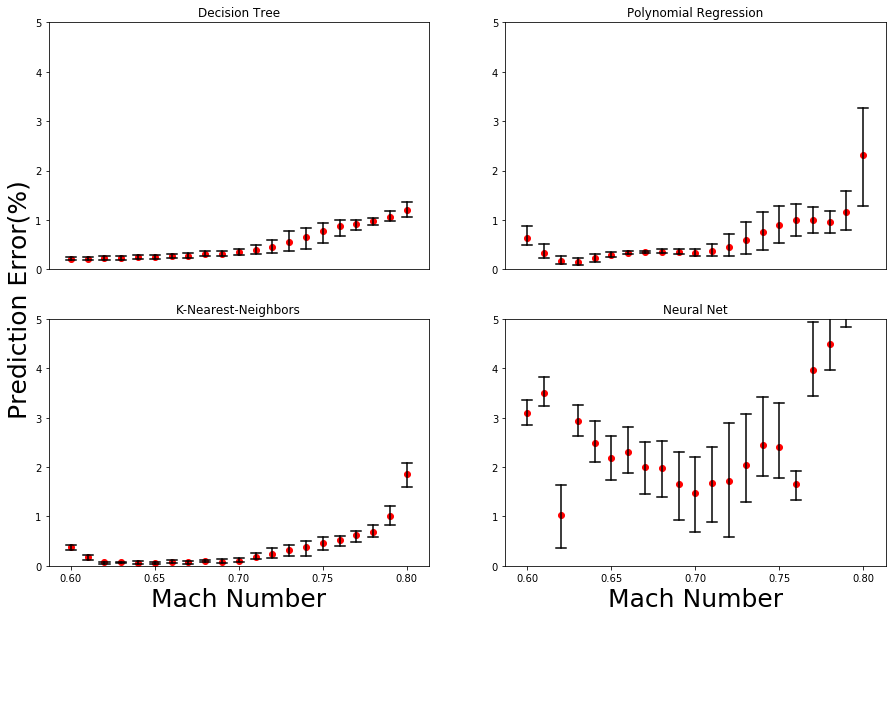

In [17]:
def plot_range_error():
    dt = np.loadtxt("airfoil_data/predictions/c%s/averageError/NMAE_range_DT" %airfoil, delimiter = ",")*100
    pr = np.loadtxt("airfoil_data/predictions/c%s/averageError/NMAE_range_PR" %airfoil, delimiter = ",")*100
    nn = np.loadtxt("airfoil_data/predictions/c%s/averageError/NMAE_range_NN" %airfoil, delimiter = ",")*100
    knn = np.loadtxt("airfoil_data/predictions/c%s/averageError/NMAE_range_KNN" %airfoil , delimiter = ",")*100

    mlnames = ["Decision Tree","Polynomial Regression","K-Nearest-Neighbors","Neural Net"]
    mach_og = np.array([.60,.61,.62,.63,.64,.65,.66,.67,.68,.69,.70,.71,.72,.73,.74,.75,.76,.77,.78,.79,.80]) 
    plt.figure(figsize = (15,10))
    for idx,ml in enumerate([dt,pr,knn,nn]):
        plt.subplot(2,2,idx+1)
        for i in range(21):
            plt.plot([mach_og[i]-.003,mach_og[i]+.003],[ml[i,0],ml[i,0]],color = 'k')

        for i in range(21):
            plt.plot([mach_og[i],mach_og[i],mach_og[i]],ml[i,:], color = 'k')


        for i in range(21):
            plt.plot([mach_og[i]-.003,mach_og[i]+.003],[ml[i,2],ml[i,2]],color = 'k')

        plt.title(mlnames[idx])
        plt.scatter(mach_og, ml[:,1], marker = 'o', color = 'r')
        if (idx+1 == 3) or (idx+1 == 4):
            plt.xlabel("Mach Number",fontsize = 25)
        else:
            plt.xticks([]) 

        if (idx+1 == 3):
            plt.ylabel("                                    Prediction Error(%)", fontsize = 25)
        plt.ylim([0.0,5.0])
plot_range_error()

## Convert to ASCII .dat format for plotting in tecplot

The following converts predictions and error fields back to tecplot format 

In [19]:
def getCoords(clf='DT',m = 60, one = 0, cl = 8500):
    '''
    This function converts predicted pressure fields to tecplot format and also saves 
    error fields.
 
     INPUT:   
          clf       (string) - the machine learning model used to predict Xr
          m         (int) - the mach number of the prediction
          one       (int) - the cl index of the prediction 
                          e.g. one = 0 means CL = 4000, one = 6 means CL = 9000 
        
                    
     OUTPUT: 
          None - Saves the predicted pressure & error field in a .dat tecplot formatted
    '''
    #Collect the xy coords and append them to our predictions so we can plot in tecplot
    file_path = "airfoil_data/c120/rawTec/M_0p60_CL_0p4000/flow.dat"

    datContent = [i.strip().split() for i in open(file_path).readlines()]
    numNodes = np.int(datContent[2][2][:-1])


    connect = np.array(datContent[numNodes+3:])
    
    xy = np.loadtxt("%s/M_0p%s_CL_0p%s.csv" %(csv_path_output,m,cl), delimiter = ",",skiprows = 1)[:,:2]

    ### PREDICTIONS
    #Load Predicted
    pressure = np.loadtxt("%s%s_M_%s_PredictedOutputFull.csv" %(reconstruct_filename,clf,m), delimiter = ",")
    pressure = pressure[:,one] #one test case at a time in this file

    xyp1 = np.hstack((xy,pressure.reshape(pressure.shape[0],1))) #append connectivity info
    tec_filename = "airfoil_data/predictions/c%s/Tecs/" %airfoil
    os.makedirs(os.path.dirname(tec_filename), exist_ok=True)

    with open("%s%s_M%s_CL%s_Predicted.dat" %(tec_filename,clf,m,cl), "w+") as f:
        writer = csv.writer(f, delimiter = " ")
        f.write("TITLE = \"Visualization of the volumetric solution\"\n")
        f.write("VARIABLES = \"x\",\"y\", \"Pressure\"\n")
        f.write("ZONE NODES= %s, ELEMENTS= %s, DATAPACKING=POINT, ZONETYPE=FEQUADRILATERAL\n" %(numNodes, datContent[2][4][:-1],))
        writer.writerows(xyp1)
        writer.writerows(connect)
        
        
    ### ERROR FIELDS

        
    #Load True
    true_path = "%s/M_0p%s_CL_0p%s.csv" %(csv_path_output,m,cl)
    pressure_true = pd.read_csv(true_path)  
    pressure_true = pressure_true["Pressure"]

    error_field = np.abs(pressure_true - pressure)/np.abs(pressure_true)

    #append connectivity info
    xyp2 = np.hstack((xy,error_field.reshape(error_field.shape[0],1))) 
    tec_filename_err = "airfoil_data/predictions/c%s/RelativeErrorFields/" %airfoil
    os.makedirs(os.path.dirname(tec_filename_err), exist_ok=True)

    with open("%s%s_M%s_CL%s_Error.dat" %(tec_filename_err,clf,m,cl), "w+") as f:
        writer = csv.writer(f, delimiter = " ")
        f.write("TITLE = \"Visualization of the volumetric solution\"\n")
        f.write("VARIABLES = \"x\",\"y\", \"Pressure\"\n")
        f.write("ZONE NODES= %s, ELEMENTS= %s, DATAPACKING=POINT, ZONETYPE=FEQUADRILATERAL\n" %(numNodes, datContent[2][4][:-1],))
        writer.writerows(xyp2)
        writer.writerows(connect)
        
#This will take a while. 
#iterate through a collection of predictions and save to tec
for clf in ['NN','PR','KNN','DT']:
        for m in M:
            for one,cl in enumerate(CL):
                getCoords(clf,m,one,cl)
        print('%s Done' %clf)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


NN Done
PR Done
KNN Done
DT Done


These .dat files can be visualized in TecPlot 360 to reproduce those found in the paper

# Heated Rod Example
This case study illustrates the use of particular solutions to enforce time dependent boundary conditions through an application of the heat equation. 

## Problem setup: predicting temperature distribution 

In this example, we demonstrate how modifying our snapshots with a particular solution can guarantee predictions satisfying boundary conditions. Our snapshots are generated from the heat equation :
\begin{equation}
\frac{\partial q}{\partial t} = \kappa \frac{\partial^2 q}{\partial x^2} + f
\end{equation}
which simulates the temperature distribution of a rod of length $L$ over time given initial and boundary conditions. 

The input parameters for this example are the time, $t$, and the diffusivity, $\kappa$. Our input parameter vector is $\mathbf{p} = [t,\kappa] \in \mathbb{R}^2$. Our output quantity of interest is the discretized temperature distribution along a rod of length $L$ which behaves according to the heat equation with Dirichlet boundary conditions and initial condition defined as
\begin{align}
\mathbf{q}(0,t) &= \gamma_0f(t)\quad
\mathbf{q}(L,t) = \gamma_L\\
\mathbf{q}(x,0) &= 0
\end{align}



## Particular solution

To demonstrate how to determine an appropriate particular solution, consider the specific case that the boundary at the left end of the rod ($x = 0$) is prescribed to follow a time-dependent forcing function, $q(0,t) = \gamma_0 f(t)$, where $\gamma_0$ is a scalar amplitude and $f(t)$ specifies the time-varying component of the boundary condition, and the boundary at the right end of the rod is constrained to a fixed temperature value, $q(L,t) = \gamma_L$. 

We first solve an auxiliary problem with the same heated rod problem setup but with boundary conditions $q(0,t) = 0$ and $q(L,t) = 1$. Denote the resulting steady-state solution as $\bar{q}^L(x)$. This first auxiliary problem solution is used to enforce the boundary condition at $x = L$. Second, solve an auxiliary problem with boundary conditions $q(0,t) = 1$ and $q(L,t) = 0$, and denote the resulting steady-state solution as $\bar{q}^0(x)$. This second auxiliary problem solution is used to enforce the boundary condition at $x = 0$. Then to reconstruct solutions for our original problem, we define the particular solution 

\begin{equation} \bar{q}(x,t) = \gamma_0f(t)\bar{q}^0(x) + \gamma_L\bar{q}^L(x) \end{equation}

It can be seen that subtracting this particular solution off each snapshot (noting that when considering each snapshot, $f ( t )$ must be evaluated at the time corresponding to that snapshot) yields a modified snapshot set with homogenous boundary conditions, which in turn leads to a POD basis that satisfies homogenous boundary conditions. Reconstruction of solutions is then guaranteed to recover the boundary conditions regardless of the values of the reduced coefficients.



## Generate snapshots

In this section, we generate our snapshots and input data by solving the heat equation over a range of diffusivities and timesteps. First we define our import statements and the finite difference solution to the 1-D heat equation (heated_rod_solver). Then we define the snapshot parameters and generate the snapshots. 

In [29]:
#IMPORTS#
import numpy as np
import os
import matplotlib.pyplot as plt
import inspect
import random
from sklearn.tree import DecisionTreeRegressor

In [30]:
def heated_rod_solver(init,Nx,L,Nt,T,U_L,U_R,Ux_L,Ux_R, f, a):
    '''
    Crank Nicholson/Central difference Diffusion Equation 
        u_t = a*u_xx + f

    Initial Value: u(x,0) = init(x)

    Boundary Conditions: 'None', a callable function, or a float
        Dirichlet
            u(0,t) = U_L    u(L,t) = U_R
        Neumann
            u_x(0,t) = Ux_L     u_x(L,t) = Ux_R

    Nx - Number of spatial points
    L - length of the rod
    Nt - Number of temporal points
    T - End time
    f - Forcing Term 
    a - Thermal diffusivity

    '''    
    x = np.linspace(0,L,Nx+1) # spatial points
    dx = x[1]-x[0] # spacing
    tgrid = np.linspace(0,T,Nt+1) #temporal points
    dt = tgrid[1]-tgrid[0] # spacing
    F = dt*a/(2*dx**2) #just a constant


    u = np.zeros((Nx+1,Nt+1)) #holds the solution
    u[:,0] = init(x) #set the initial value


    # Set up finite difference matrices
    one = np.ones((Nx+1))*(1+2*F)
    A = np.diag(one)
    A = A+np.diag(np.ones((Nx))*(-F),1)
    A = A+np.diag(np.ones((Nx))*(-F),-1)

    D = np.ones((Nx+1))

    for t in range(1,Nt+1): 
        #Interior Points
        for i in range(1,Nx):
            D[i] = u[i,t-1]+F*(u[i+1,t-1]-2*u[i,t-1]+u[i-1,t-1])
        
        '''Left end point'''
        # print("Left End")
        '''DIRICHLET'''
        if U_L == 'None':
            #No dirichlet 
            None
        elif callable(U_L):
            #time dependent dirichlet
            D[0] = U_L(tgrid[t])
            A[0,:] = np.zeros((Nx+1))
            A[0,0] = 1; A[0,1] = 0
        else: 
            #constant dirichlet
            A[0,:] = np.zeros((Nx+1))
            A[0,0] = 1.0; A[0,1] = 0.0;
            D[0] = U_L

        # '''NEUMANN'''
        if Ux_L == 'None':
            #No neumann
            None
        elif callable(Ux_L):
            #functional neumann
            A[1,:] = np.zeros((Nx+1))
            D[1] = Ux_L(tgrid[t])*dx
            A[1,0] = 1.0 
            A[1,1] = -1.0;
        else:
            #constant neumann
            A[1,:] = np.zeros((Nx+1))
            D[1] = Ux_L*dx
            A[1,0] = 1.0 
            A[1,1] = -1.0;

        
        '''Right end point'''
        '''DIRICHLET'''
        if U_R == 'None':
            #No dirichlet 
            None
        elif callable(U_R):
            #time dependent dirichlet
            D[-1] = U_R(tgrid[t])
            A[-1,:] = np.zeros((Nx+1))
            A[-1,-1] = 1; A[-1,-2] = 0
        else: 
            #constant dirichlet
            A[-1,:] = np.zeros((Nx+1))
            A[-1,-1] = 1.0; A[-1,-2] = 0.0;
            D[-1] = U_R

        '''NEUMANN'''
        if Ux_R == 'None':
            #No neumann
            None
        elif callable(Ux_R):
            #functional neumann 
            A[-2,:] = np.zeros((Nx+1))
            D[-2] = Ux_R(tgrid[t])*dx
            A[-2,-1] = 1.0 
            A[-2,-2] = -1.0;
        else:
            #constant neumann
            A[-2,:] = np.zeros((Nx+1))
            D[-2] = Ux_R*dx
            A[-2,-1] = 1.0 
            A[-2,-2] = -1.0;
        
        D = D+f #forcing term

        u[:,t] = np.linalg.solve(A,D)
    return u

In [31]:
### GENERATE SNAPSHOTS
def generate_snapshots(fname_snap_1,fname_input_1,init,left_BC,right_BC,As,n_a,d,T,Nx,L,x,f,dt,Nt,t,n_t,t_idx):
    iteration = 0
    snapshots = np.zeros((d,n_t*n_a))

    alphas = np.zeros((n_t*n_a))
    times = np.zeros((n_t*n_a))
    count = 0
    input_num = {}
    for k in range(n_a): #for each diffusivity
        #run the model
        sol = heated_rod_solver(init,Nx,L,Nt,T,left_BC,right_BC,'None','None', f, As[k]);

        for j in t_idx:  #for each timestep to save
            snapshots[:,count] = sol[:,j]
            times[count] = t[j]
            alphas[count] = As[k]
            count += 1


    input_num["alphas"] = alphas
    input_num["times"] = times
    input_num["init"] = inspect.getsource(init)  
    input_num["leftBC"] = (left_BC)
    input_num["rightBC"] = (right_BC)

    plt.plot(snapshots)
    plt.title("Snapshots for kappa = %f" %As[k])
    plt.xlabel("X")
    plt.ylabel("Temperature")
    plt.show()

    np.savetxt(fname_snap_1,snapshots)

    np.save(fname_input_1,input_num)

Total snapshots to generate =  942


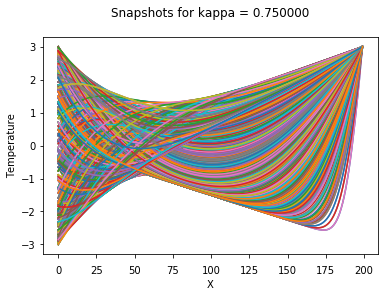

In [32]:
### USER INPUT - SNAPSHOT PARAMETERS & GENERATE SNAPSHOTS

#give a name to the snapshots being generated
typeOfSnapshots = 'snapshots_init_linear'

#enter the filenames you want the solution and input data saved to me
fname_snap_1 = 'heat/%s.txt' %typeOfSnapshots
fname_input_1 = 'heat/%s.npy' %typeOfSnapshots

# Create the directories if they dont exist
os.makedirs(os.path.dirname('heat/'), exist_ok=True)

# the initial conditions until we do it fancier
init = lambda x: (-3/L)*x;

''''''''''''''''''''''''''''''''''''''''''''''''''
#dirichlet boundary conditions
def left_BC(t): return 3*np.math.sin(2*t)
def right_BC(t):  return 3

As = np.linspace(0.25,0.75,6)   # thermal diffusivities
n_a = len(As)                   # Number of different thermal diffusivity values
d = 200                         # Dimension of solution

T = 2*np.math.pi                  # final time
Nx = d-1                        # dimension of solution minus 1   
L = 4                           # Length of domain
x = np.linspace(0,L,Nx+1)       # discrete points in domain where equation is solved
f=0                             # source term
dt = .01                        # timestep size
Nt = int(round(T/dt))           # Number of timesteps for each diffusivity 
t = np.linspace(0,T,Nt)         # Time instances to solve for 
n_t = int(Nt/4)                 # Number of timesteps to save
t_idx = np.random.randint(0,Nt,n_t) # Indices of timesteps to save - save only a quarter of the timesteps

print("Total snapshots to generate = ", n_t*n_a)
generate_snapshots(fname_snap_1,fname_input_1,init,left_BC,right_BC,As,n_a,d,T,Nx,L,x,f,dt,Nt,t,n_t,t_idx)

## Construct POD basis

In this section, we load all the snapshot data and compute the POD basis for three scenarios. A basis for the original data, a basis for mean subtracted data, and a basis for data that has been modified with our particular solution.

In [33]:
##### Load data
##### LOAD INPUT FILE #####
in1 = np.load(fname_input_1)

##### READ/STORE INPUT DATA #####
inputs = {}
inputs["times"] = in1.item().get('times') #n x 1
inputs["alphas"] = in1.item().get('alphas')#n x 1
inputs["init"] = in1.item().get('init')# d x 2
U_L = in1.item().get('leftBC')
U_R = in1.item().get('rightBC')

##### LOAD SNAPSHOT FILE #####
snapshots = np.loadtxt(fname_snap_1)
d,n = snapshots.shape


In [34]:
# Define training and test sets
# 3 scenarios 
method = ["particular","mean","raw"]

##### NUMBER OF TEST POINTS AND INITIALIZE ERROR #####
n_test_points = 31
Test_points = random.sample(range(n),n_test_points)
Train_points = np.arange(n)
Train_points = [x for x in Train_points if x not in Test_points]

# Train and test inputs
train_inputs = np.c_[inputs["alphas"][Train_points],inputs["times"][Train_points]]
test_inputs = np.c_[inputs["alphas"][Test_points],inputs["times"][Test_points]]

# Train and test snapshots
train_snapshots = snapshots[:,Train_points]
test_snapshots = snapshots[:,Test_points]

    
sq_error = np.zeros((len(method),n_test_points,d))
abs_error = np.zeros((len(method),n_test_points,d))

print("Size of snapshot matrix:", snapshots.shape)
print("Number of train points: ", len(Train_points))
print("Number of test points: " , len(Test_points))


Size of snapshot matrix: (200, 942)
Number of train points:  911
Number of test points:  31


In [35]:
### a script for plotting particular solutions
from matplotlib import rcParams
rcParams['xtick.major.pad']='8'
rcParams['axes.titlepad'] = 20 


def particular_plot(x,particular_train_right,i,title = ""):
    plt.figure(1,figsize=(16, 7))
    plt.subplot(1,3,i)
    plt.plot(x,particular_train_right,linewidth = 3)
    plt.margins(0)
    plt.xticks([0,2,4],['$0$',r'$\frac{L}{2}$',r'L'],fontsize = 30)

    if i == 1:
        plt.yticks(fontsize = 30)
        plt.ylabel("Temperature",fontsize = 35)
    if i == 2:
        plt.xlabel("Spatial Location", fontsize = 35)
        plt.yticks([])
        
    if i == 3:
        plt.yticks([])
        
    plt.ylim([-1,2])
    plt.title(title,fontsize = 35)


def plot_snapshots(snapshots,title=""):
    # plt.figure()
    plt.margins(0)

    plt.plot(snapshots)
    plt.xlabel("Spatial Location",fontsize = 35)
    plt.ylabel("Temperature", fontsize = 35)
    #plt.xticks(np.linspace(0,d,5),np.arange(5),fontsize = 30)
    plt.xticks([0,100,200],['$0$',r'$\frac{L}{2}$',r'L'],fontsize = 30)

    plt.yticks(fontsize = 30)
    plt.title(title)
    #plt.show()


 METHOD: particular
----------------------------
left BC Time dependent
right BC constant
Modified snapshots shape =  (200, 911)
Dimension of POD basis 4
Reduced snapshot shape =  (4, 911)
Size of training data ( features x samples ):  (4, 911)

 METHOD: mean
----------------------------
Modified snapshots shape =  (200, 911)
Dimension of POD basis 5
Reduced snapshot shape =  (5, 911)
Size of training data ( features x samples ):  (5, 911)

 METHOD: raw
----------------------------
Modified snapshots shape =  (200, 911)
Dimension of POD basis 6
Reduced snapshot shape =  (6, 911)
Size of training data ( features x samples ):  (6, 911)


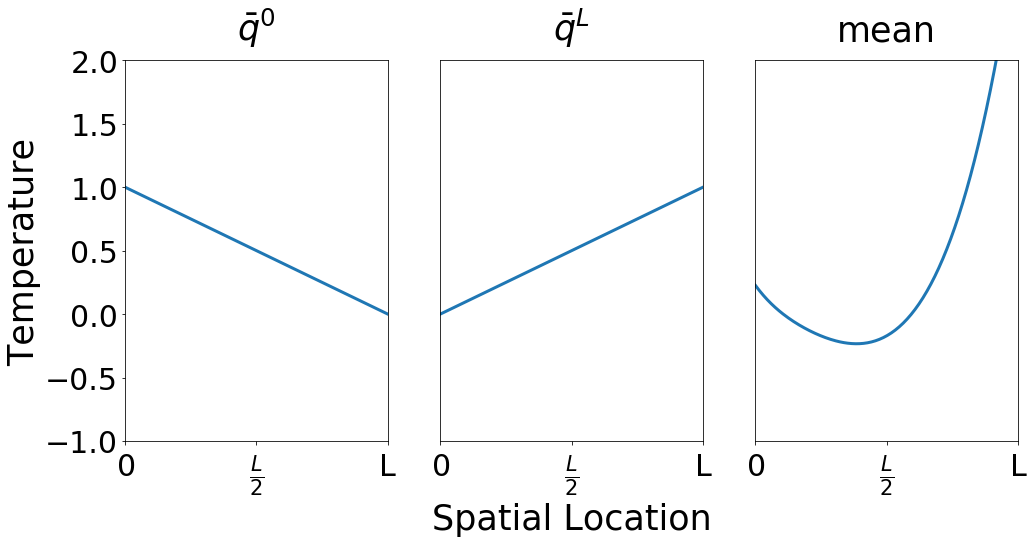

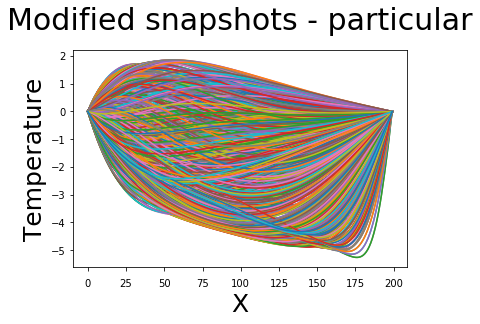

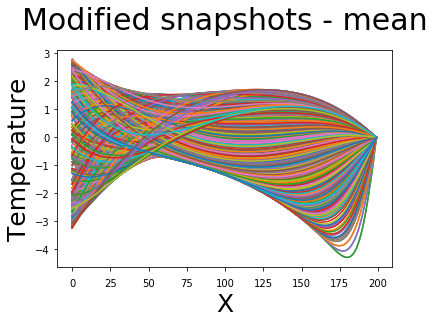

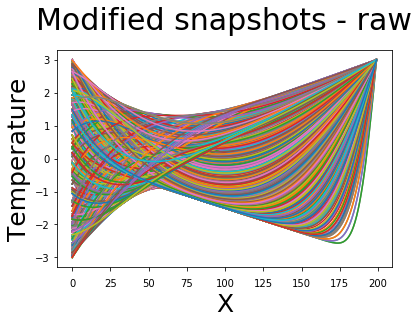

In [36]:
### 1) compute and plot particular solutions 2) compute modified snapshots and POD basis 3) make predictions


#### 1) COMPUTE AND PLOT PARTICULAR SOLUTION
for m_num in range(len(method)):
    particular_type = method[m_num]
    print("\n METHOD: %s\n----------------------------" %particular_type)
    if particular_type == "particular":
        if U_L(0) != U_L(20):
            print("left BC Time dependent")

            #Solve steady state-ish for left boundary 
            sol = heated_rod_solver(lambda x: 0,d-1,L,500,np.math.pi*2,1,0,'None','None', 0, 2)
            particular = sol[:,-1]
            particular_plot(np.linspace(0,L,d),particular,1,title = r'$\bar{q}^0$')

            # f(t) for left boundary - training data 
            f_of_t_train = train_snapshots[0,:] # all elements corr to left boundary
            particular_train_left = particular.reshape(len(particular),1) @ f_of_t_train.reshape(1,len(f_of_t_train))

            # f(t) for left boundary - testing data
            f_of_t_test = test_snapshots[0,:]
            particular_test_left = particular.reshape(len(particular),1) @ f_of_t_test.reshape(1,len(f_of_t_test))

        else:
            print("left BC constant")

            #Solve steady state-ish for left boundary 
            sol = heated_rod_solver(lambda x: 0,d-1,L,500,np.math.pi*2,1,0,'None','None', 0, 2)
            particular = sol[:,-1]

            #the boundary value
            gamma = U_L(0) 
            particular_plot(np.linspace(0,L,d),particular,1,title = r'$\bar{q}^0$')

            particular_train_left = (particular*gamma).reshape((d,1))
            particular_test_left = (particular*gamma).reshape((d,1))


        if U_R(0) != U_R(20):
            print("right BC Time dependent")

            #Solve steady state-ish for left boundary 
            sol = heated_rod_solver(lambda x: 0,d-1,L,500,np.math.pi*2,0,1,'None','None', 0, 2)
            particular = sol[:,-1]
            particular_plot(np.linspace(0,L,d),particular,2,title = r'$\bar{q}^L$')

            # f(t) for left boundary - training data 
            f_of_t_train = train_snapshots[-1,:] # all elements corr to right boundary
            particular_train_right = particular.reshape(len(particular),1) @ f_of_t_train.reshape(1,len(f_of_t_train))

            # f(t) for left boundary - testing data
            f_of_t_test = test_snapshots[-1,:]
            particular_test_right = particular.reshape(len(particular),1) @ f_of_t_test.reshape(1,len(f_of_t_test))

        else:
            print("right BC constant")

            #Solve steady state-ish for left boundary 
            sol = heated_rod_solver(lambda x: 0,d-1,L,500,np.math.pi*2,0,1,'None','None', 0, 2)
            particular = sol[:,-1]

            #the boundary value
            gamma = U_R(0) 
            particular_plot(np.linspace(0,L,d),particular,2,title = r'$\bar{q}^L$')

            particular_train_right = (particular*gamma).reshape((d,1))
            particular_test_right = (particular*gamma).reshape((d,1))
            
    if particular_type == "mean":
        particular_train_left = np.mean(train_snapshots,1).reshape((d,1))
        particular_train_right = np.zeros((d,1)); 
        particular_test_left = np.mean(train_snapshots,1).reshape((d,1))
        particular_test_right = np.zeros((d,1));
        particular_plot(np.linspace(0,L,d),particular_train_left,3,title = 'mean')
  
    if particular_type == "raw": 
        particular_train_left = np.zeros((d,1));
        particular_train_right = np.zeros((d,1)); 
        particular_test_left = np.zeros((d,1));
        particular_test_right = np.zeros((d,1));

#### 2.1) COMPUTE MODIFIED SNAPSHOTS 
    modified_snapshots = train_snapshots - particular_train_left - particular_train_right 
    print("Modified snapshots shape = ", modified_snapshots.shape)
    plt.figure(m_num+2)
    plt.plot(modified_snapshots)
    plt.xlabel("X", fontsize = 25)
    plt.ylabel("Temperature", fontsize = 25)
    plt.title("Modified snapshots - %s" %particular_type, fontsize = 30)


#### 2.2) COMPUTE POD BASIS
    [U,S,V] = np.linalg.svd(modified_snapshots, full_matrices = False)
    sdiag = np.diag(S)
    cumulative = np.zeros((d,1))
    r = 0
    for k in range(d):
        cumulative[k] = np.sum(sdiag[:k])/np.sum(sdiag)
        if cumulative[k] <= .975: #enough basis vectors to capture 97.5% energy
            r += 1
    print("Dimension of POD basis", r)
    U = np.matrix(U)
    
    alphas = U[:,:r].T@modified_snapshots
    print("Reduced snapshot shape = ", alphas.shape)
    
    
#### 3) MAKE PREDICTIONS

    regressor = DecisionTreeRegressor()

    '''''''''''''''Train and Predict'''''''''''''''''''''''''''
    print("Size of training data ( features x samples ): ", alphas.shape)
    regressor.fit(train_inputs,alphas.T)

    ''''''''''''

    pred = np.zeros((n_test_points,r))
    for k in range(n_test_points):
        pred[k,:] = regressor.predict(test_inputs[k,:].reshape(1,-1))
    pred_full = U[:,:r]@pred.T
    pred_full = pred_full+particular_test_left+particular_test_right
    
    '''''''''''''Compute error'''''''''''''''''''''''''''''''''''''''''''''''''
    for j in range(n_test_points):
        abs_error[m_num,j,:] = np.abs(pred_full[:,j] - test_snapshots[:,j].reshape((d,1))).reshape((d))


## Plot error

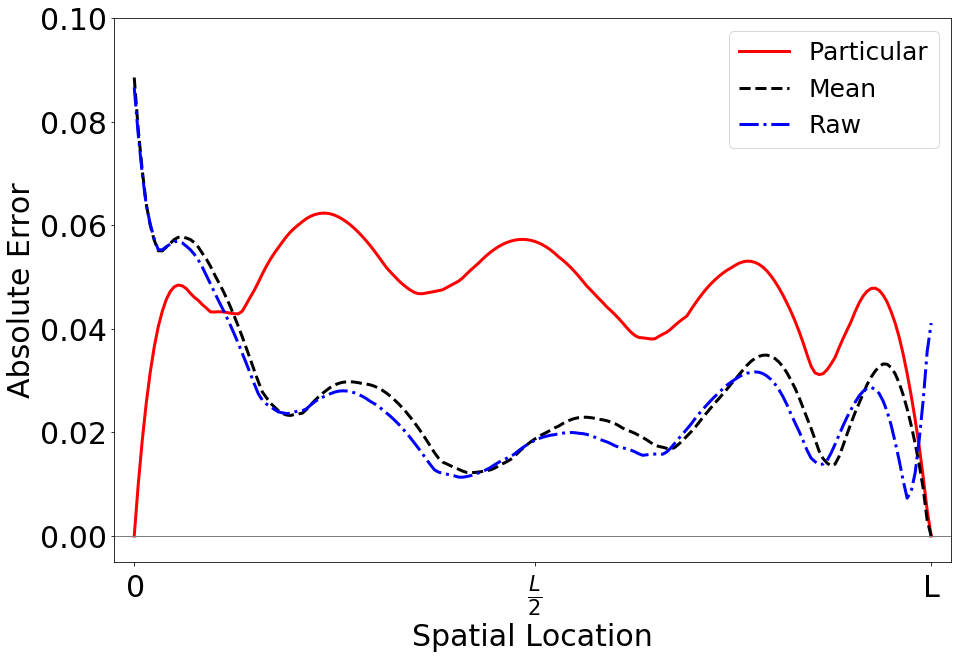

In [37]:
plt.figure(figsize = (15,10))
plt.margins(0)
plt.plot(np.mean(abs_error[0,:,:],0),label = 'Particular',linestyle ='solid',linewidth = 3,c = 'r')
plt.plot(np.mean(abs_error[1,:,:],0),label = 'Mean',linestyle = '--',linewidth = 3,c = 'k')
plt.plot(np.mean(abs_error[2,:,:],0),label = 'Raw',linestyle ='-.',linewidth = 3,c = 'b')
plt.plot(np.arange(-5,205),np.zeros(210),linewidth = 1, c = 'gray')
plt.xlabel("Spatial Location", fontsize = 30)
plt.ylabel("Absolute Error",fontsize = 30)
plt.xticks([0,100,199],['$0$',r'$\frac{L}{2}$',r'L'],fontsize = 30)
plt.ylim([-.005,.1])
plt.yticks(fontsize = 30)
plt.legend(fontsize = 25)